In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print('imports completed')

imports completed


Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('datos_merged_1986_2023.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,track_id,track_name,popularity,available_markets,disc_number,duration_ms,explicit,track_number,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
0,0,0,2A6yzRGMgSQCUapR2ptm6A,True Colors,73,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,227600,NaN,4,...,0.0,0.1160,-13.155,1.0,0.0331,171.282,4.0,0.268,1986,3.793333
1,1,1,3gKwVWwKmeuFtPubICbOGc,Paul Revere,61,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,220840,NaN,9,...,6.0,0.2280,-13.232,0.0,0.9440,91.753,4.0,0.578,1986,3.680667
2,2,2,2tY1gxCKslfXLFpFofYmJQ,Brass Monkey,68,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,157440,NaN,11,...,6.0,0.0992,-8.435,0.0,0.3300,116.371,4.0,0.655,1986,2.624000
3,3,3,31dqpLUModJWNbxrXu6TWd,Shot in the Dark,66,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,256293,NaN,9,...,6.0,0.1420,-7.262,1.0,0.0324,123.887,3.0,0.619,1986,4.271550
4,4,4,00vYs0qZA40Z8AAaN7xmMO,Manic Monday,63,AE;BH;EG;GB;IE;IQ;JO;KW;LB;LY;OM;PS;QA;SA;US,1,184160,NaN,1,...,2.0,0.3580,-10.906,1.0,0.0289,121.761,4.0,0.853,1986,3.069333


In [47]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,popularity,disc_number,duration_ms,explicit,track_number,album_total_tracks,principal_artist_followers,acousticness,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
count,11450.000000,11450.000000,11450.000000,11450.000000,1.145000e+04,2767.0,11450.000000,11450.000000,1.144900e+04,11445.000000,...,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11445.000000,11450.000000,11450.000000
mean,5724.500000,719.259825,67.999301,1.017380,2.301816e+05,1.0,5.251790,14.206550,9.683476e+06,0.225722,...,5.266841,0.182999,-7.533924,0.677676,0.087618,121.067908,3.931586,0.538075,2004.248908,3.836360
std,3305.474626,444.374593,9.334255,0.195043,1.181226e+05,0.0,4.415936,9.548194,1.825129e+07,0.261519,...,3.544261,0.145042,3.776597,0.467387,0.092985,30.083328,0.352431,0.244916,11.030970,1.968709
min,0.000000,0.000000,44.000000,1.000000,3.349300e+04,1.0,1.000000,1.000000,3.100000e+01,0.000000,...,0.000000,0.000000,-47.070000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.000000,0.558217
25%,2862.250000,326.000000,61.000000,1.000000,1.917228e+05,1.0,2.000000,11.000000,9.069540e+05,0.018300,...,2.000000,0.092200,-9.211000,0.000000,0.033900,96.955000,4.000000,0.346000,1995.000000,3.195379
50%,5724.500000,696.000000,68.000000,1.000000,2.232135e+05,1.0,4.000000,13.000000,2.901792e+06,0.112000,...,5.000000,0.125000,-6.721000,1.000000,0.047300,119.250000,4.000000,0.541000,2004.000000,3.720225
75%,8586.750000,1105.000000,75.000000,1.000000,2.591132e+05,1.0,8.000000,16.000000,8.626437e+06,0.362000,...,8.000000,0.237000,-5.021000,1.000000,0.093800,140.060000,4.000000,0.736000,2014.000000,4.318554
max,11449.000000,1599.000000,100.000000,10.000000,1.082819e+07,1.0,48.000000,176.000000,1.146750e+08,0.996000,...,11.000000,0.982000,0.522000,1.000000,0.944000,220.099000,5.000000,0.994000,2023.000000,180.469833


In [49]:
df.isnull().sum()


Unnamed: 0.1                     0
Unnamed: 0                       0
track_id                         0
track_name                       0
popularity                       0
available_markets                1
disc_number                      0
duration_ms                      0
explicit                      8683
track_number                     0
href                             0
album_id                         0
album_name                       0
album_release_date               0
album_type                       0
album_total_tracks               0
artists_names                    0
artists_ids                      0
principal_artist_id              0
principal_artist_name            0
artist_genres                  117
principal_artist_followers       1
acousticness                     5
analysis_url                     5
danceability                     5
energy                           5
instrumentalness                 5
key                              5
liveness            

In [83]:
df.duplicated().sum()

0

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11333 entries, 0 to 11449
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                11333 non-null  int64  
 1   Unnamed: 0                  11333 non-null  int64  
 2   track_id                    11333 non-null  object 
 3   track_name                  11333 non-null  object 
 4   popularity                  11333 non-null  int64  
 5   available_markets           11333 non-null  object 
 6   disc_number                 11333 non-null  int64  
 7   duration_ms                 11333 non-null  int64  
 8   explicit                    2736 non-null   float64
 9   track_number                11333 non-null  int64  
 10  href                        11333 non-null  object 
 11  album_id                    11333 non-null  object 
 12  album_name                  11333 non-null  object 
 13  album_release_date          11333 no

<Axes: xlabel='year', ylabel='popularity'>

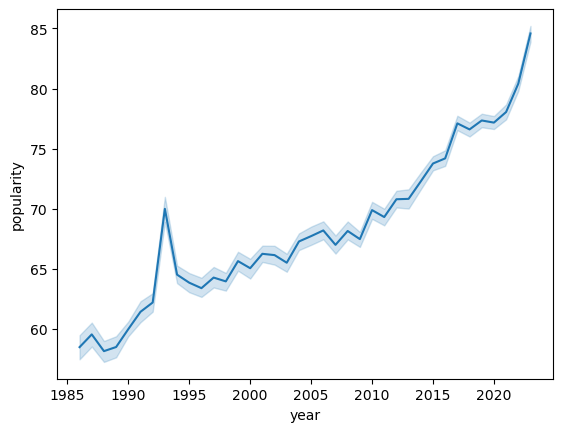

In [104]:
sns.lineplot(data = df, x = 'year', y = 'popularity')

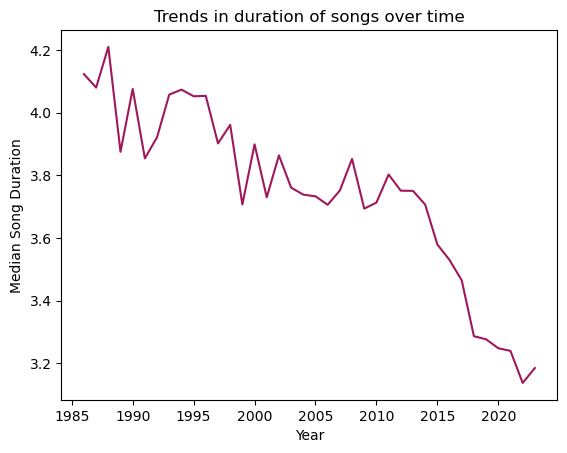

In [125]:
df_year = df.groupby('year').agg({'duration_min': 'median'}).reset_index()

df_year.rename(columns={'duration_min': 'median_duration'}, inplace=True)

import matplotlib.pyplot as plt
plt.plot(df_year.year, df_year.median_duration, color='#9F185C')
plt.xlabel('Year')
plt.ylabel('Median Song Duration')
plt.title('Trends in duration of songs over time')
plt.show()

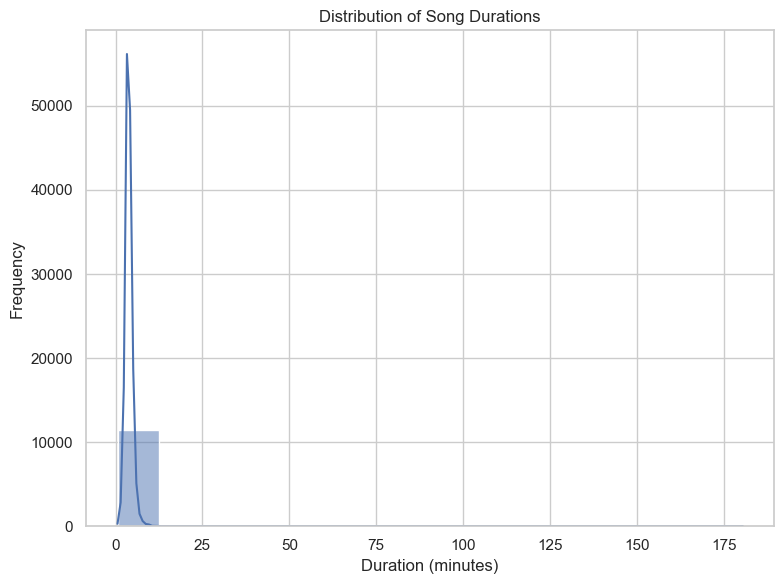

In [147]:
plt.figure(figsize=(8, 6))
sns.histplot(df['duration_min'], kde=True, bins=15)

plt.title('Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

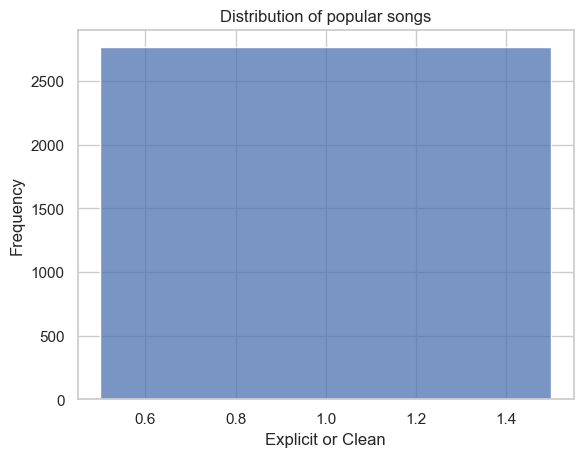

In [149]:
sns.histplot(df['explicit'])
plt.xlabel('Explicit or Clean')
plt.ylabel('Frequency')
plt.title('Distribution of popular songs')
plt.show()

In [35]:
#dropping null values
df_clean = df.dropna(subset=features)

df_clean['track_id'] = df['track_id'].loc[df_clean.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

kmeans = KMeans(n_clusters=5, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

print(df_clean[['track_id', 'cluster']].head())

                 track_id  cluster
0  2A6yzRGMgSQCUapR2ptm6A        4
1  3gKwVWwKmeuFtPubICbOGc        2
2  2tY1gxCKslfXLFpFofYmJQ        1
3  31dqpLUModJWNbxrXu6TWd        3
4  00vYs0qZA40Z8AAaN7xmMO        2


C:\Users\tjpsn\AppData\Local\Temp\ipykernel_31640\3633343206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['track_id'] = df['track_id'].loc[df_clean.index]
C:\Users\tjpsn\AppData\Local\Temp\ipykernel_31640\3633343206.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = kmeans.fit_predict(X_scaled)


In [27]:
# Print the cluster centers (centroids) for each feature
print("Cluster Centers (Centroids):")
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features)
print(centroids_df)


Cluster Centers (Centroids):
   popularity     tempo  duration_min    energy  danceability
0   -0.141461  1.447240     -0.091958  0.359548     -0.720782
1    1.018053 -0.108920     -0.413583  0.076183      0.615502
2   -0.749572 -0.405648      0.222556 -0.181997      0.828953
3   -0.398121 -0.385898      0.516108  0.871547     -0.611489
4   -0.078013 -0.581567     -0.110238 -1.559951     -0.822040


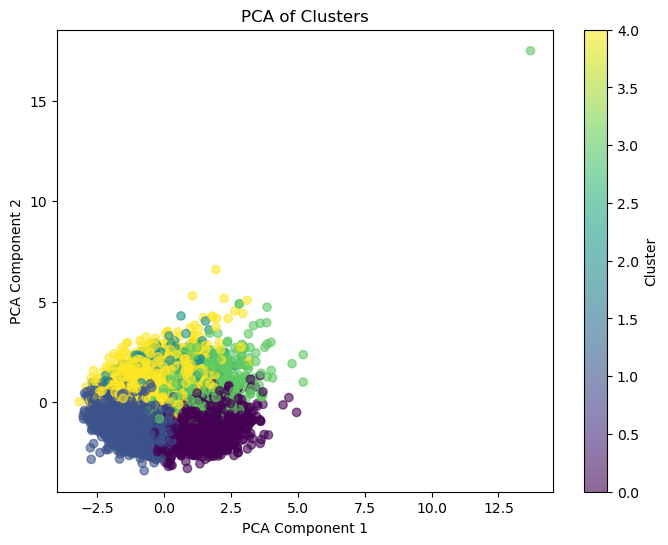

In [33]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the 2D PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clean['cluster'], cmap='viridis', alpha=0.6)
plt.title("PCA of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [37]:
df_clean_sorted = df_clean.sort_values(by=['cluster', 'popularity'], ascending=[True, False])
# Print out the top 5 songs in each cluster
print(df_clean_sorted.groupby('cluster').head(5))

       Unnamed: 0.1  Unnamed: 0                track_id  \
4344           4344        1244  3AJwUDP919kvQ9QcozQPxg   
10279         10279        1179  0otRX6Z89qKkHkQ9OqJpKt   
11174         11174         324  59uQI0PADDKeE6UZDTJEe8   
11240         11240         390  5w40ZYhbBMAlHYNDaVJIUu   
9405           9405         305  0VE4kBnHJUgtMf0dy6DRmW   
10037         10037         937  1BxfuPKGuaTgP7aM0Bbdwr   
11187         11187         337  7ABLbnD53cQK00mhcaOUVG   
11190         11190         340  7x9aauaA9cu6tyfpHnqDLo   
11156         11156         306  1vYXt7VSjH9JIM5oRRo7vA   
11162         11162         312  3k79jB4aGmMDUQzEwa46Rz   
9457           9457         357  2fhOljbX79loRcdl47SFye   
9924           9924         824  3V8UKqhEK5zBkBb6d6ub8i   
7917           7917         317  0725YWm6Z0TpZ6wrNk64Eb   
8251           8251         651  69kOkLUCkxIZYexIgSG8rq   
9558           9558         458  0M9ydKzuF3oZTfYYPfaGX1   
332             332         332  7snQQk1zcKl8gZ92AnueZW 

In [39]:
#finding the summaries of each cluster
cluster_profiles = df_clean.groupby('cluster')[features].mean()
print(cluster_profiles)

         popularity       tempo  duration_min    energy  danceability
cluster                                                              
0         66.692019  164.542692      3.722160  0.726727      0.494725
1         77.499521  117.774260      3.377325  0.667985      0.710126
2         61.010490  108.853407      4.055028  0.615245      0.744864
3         64.253582  109.418810      4.381079  0.831549      0.512351
4         67.250329  103.635679      3.706931  0.331311      0.478387


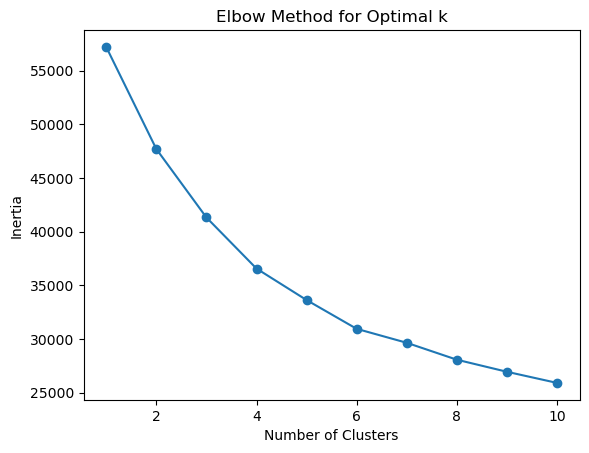

In [41]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()